In [2]:
import numpy as np
import jax.numpy as jnp
from sklearn.datasets import load_svmlight_file
import pandas as pd
import seaborn as sns
from matplotlib.colors import LogNorm
from matplotlib import pyplot as plt

In [3]:
from matplotlib.collections import LineCollection

In [4]:
from matplotlib import ticker

In [27]:
dataset_name = 'phishing'

In [40]:
stepsize_alignment = 'CLAG'

In [41]:
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

In [42]:
offset = 0.01

In [43]:
float_size = 32
n_workers = 20

In [55]:
heatmap.shape

(8, 11)

In [110]:
aclag_heatmap[:2]

array([[ 16320.,  14051.,  12514.,  12997.,  30077.,  21853.,  28433.,
         39335.,  66664.,  66976., 107999.],
       [     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.]], dtype=float32)

In [75]:
np.concatenate([heatmap, add_heatmap[:-3]],axis=0).shape

(8, 11)

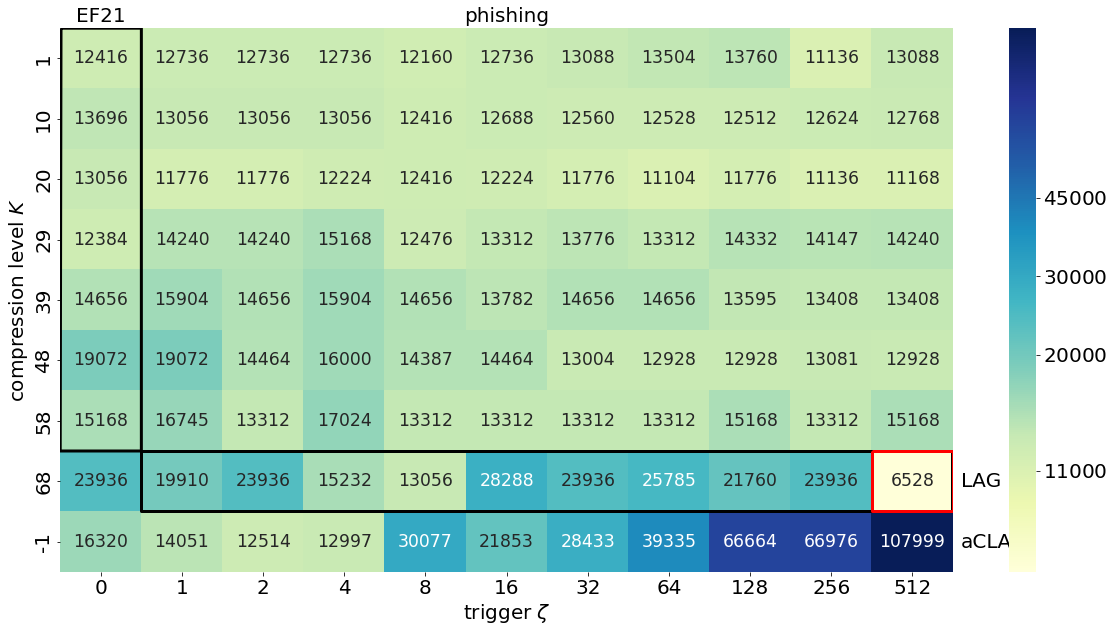

In [113]:
raw_data = load_svmlight_file('../data/' + dataset_name)
X, y = raw_data
d = X.shape[1]
del raw_data, X, y

# download heatmap
save_filepath = '../results/heatmap_{}_{}.npy'.format(
    stepsize_alignment, dataset_name)
heatmap = np.load(save_filepath)
aclag_heatmap=np.load('../results/heatmap_CLAG_phishing_True.npy')[:1]

heatmap = float_size * heatmap / n_workers
#heatmap = np.concatenate([heatmap[:-3], add_heatmap],axis=0)
# set heatmap ranges
k_num = heatmap.shape[0]
max_pow = heatmap.shape[1] - 1
ks = np.linspace(1, d, k_num, endpoint=True, dtype=int)
ks = np.append(ks,  -1)
trigger_betas = 2 ** jnp.arange(0, max_pow, dtype=int)
trigger_betas = jnp.insert(trigger_betas, 0, 0)
heatmap = np.concatenate([heatmap, aclag_heatmap],axis=0)
# save heatmap as pandas.DataFrame
mask_ = heatmap > 0
max_heatmap = int(heatmap.max().item())
min_heatmap = int(heatmap[mask_].min(initial=max_heatmap).item())
df = pd.DataFrame(heatmap, index=ks, columns=trigger_betas).astype(int)
plt.figure(figsize=(20, 10))
log_norm = LogNorm(vmin=min_heatmap, vmax=max_heatmap)
# cbar_ticks = [2500, 4500, 8500, 15000, 24000]
# cbar_ticks = [7000, 10000, 15000, 22000, 28000]
# cbar_ticks = [16000, 22000, 32000, 45000, 60000]
cbar_ticks = [11000, 20000, 30000, 45000]
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax = sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu",
                 mask=pd.DataFrame(df == -1), norm=log_norm,
                 cbar_kws={"ticks": cbar_ticks, "format": formatter},
                 annot_kws={"size": "xx-large"})
ax.collections[0].colorbar.ax.yaxis.set_ticks([], minor=True)
ax.set_xlabel(r'trigger $\zeta$')
ax.set_ylabel(r'compression level $K$')
plt.title('{}'.format(dataset_name))
y, x = np.unravel_index(np.argmin(heatmap), heatmap.shape)
ax.add_collection(LineCollection(segments=[[(offset, 0),
                                            (0, k_num - 1),
                                            (1, k_num - 1),
                                            (1, 0),
                                            (offset, 0)]],
                                 linewidth=3,
                                 color='black'))
ax.add_collection(LineCollection(segments=[[(1, k_num - 1),
                                            (max_pow + 1 - offset, k_num - 1),
                                            (max_pow + 1 - offset, k_num - offset),
                                            (1, k_num - offset),
                                            (1, k_num - 1)]],
                                 linewidth=3,
                                 color='black'))
ax.add_collection(LineCollection(segments=[[(x, y),
                                            (x + 1, y),
                                            (x + 1, y + 1),
                                            (x, y + 1),
                                            (x, y)]],
                                 linewidth=3,
                                 color='r'))
plt.text(0.2, -0.1, 'EF21', fontsize=20, color='black')
plt.text(max_pow + 1.1, k_num-0.4, 'LAG', fontsize=20, color='black')
plt.text(max_pow + 1.1, k_num+1-0.4, 'aCLAG', fontsize=20, color='black')
# plt.tight_layout()
# plt.savefig('../plots/heatmap_{}_{}.pdf'.format(
#     stepsize_alignment, dataset_name))
plt.show()

In [169]:
raw_data = load_svmlight_file('../data/' + dataset_name)
X, y = raw_data
d = X.shape[1]
del raw_data, X, y

# download heatmap
save_filepath = '../results/heatmap_{}_{}.npy'.format(
    stepsize_alignment, dataset_name)
heatmap = np.load(save_filepath)

heatmap = float_size * heatmap / n_workers

# set heatmap ranges
k_num = heatmap.shape[0]
max_pow = heatmap.shape[1] - 1
ks = np.linspace(1, d, k_num, endpoint=True, dtype=int)
trigger_betas = 2 ** jnp.arange(0, max_pow, dtype=int)
trigger_betas = jnp.insert(trigger_betas, 0, 0)

# save heatmap as pandas.DataFrame
mask_ = heatmap != -1
max_heatmap = int(heatmap.max().item())
min_heatmap = int(heatmap.min(initial=max_heatmap, where=mask_).item())
df = pd.DataFrame(heatmap, index=ks, columns=trigger_betas).astype(int)

In [170]:
new_df = df.iloc[[0, 1, 3, 5, 7, 9], ::2]

In [171]:
small_heatmap = new_df.to_numpy()

In [172]:
mask_ = small_heatmap != -1
max_new_heatmap = int(small_heatmap.max().item())
min_mew_heatmap = int(small_heatmap.min(initial=max_new_heatmap, where=mask_).item())

In [148]:
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

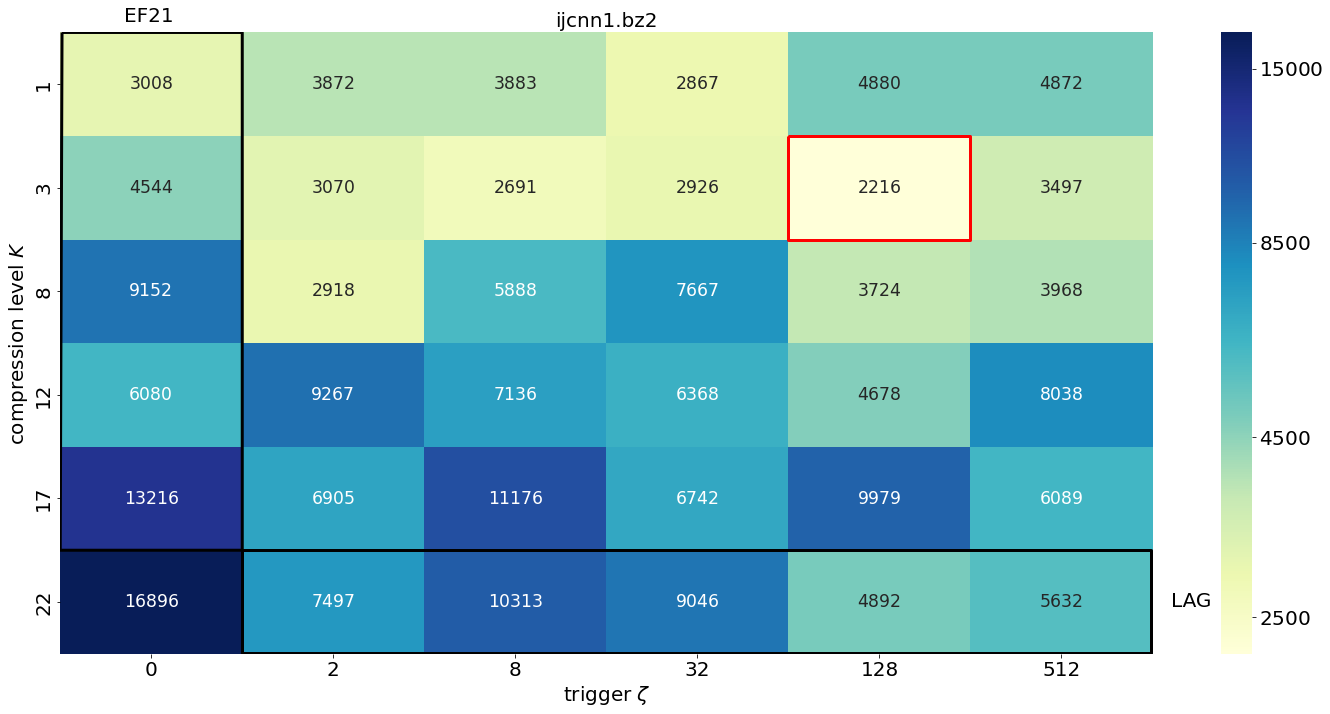

In [174]:
plt.figure(figsize=(20, 10))
log_norm = LogNorm(vmin=min_mew_heatmap, vmax=max_new_heatmap)
cbar_ticks = [2500, 4500, 8500, 15000, 24000]
# cbar_ticks = [7000, 10000, 15000, 22000, 28000]
# cbar_ticks = [16000, 22000, 32000, 38000]
# cbar_ticks = [11000, 20000, 30000, 35000]
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax = sns.heatmap(new_df, annot=True, fmt="d", cmap="YlGnBu",
                 mask=pd.DataFrame(new_df == -1), norm=log_norm,
                 cbar_kws={"ticks": cbar_ticks, "format": formatter},
                 annot_kws={"size": "xx-large"})
ax.collections[0].colorbar.ax.yaxis.set_ticks([], minor=True)
ax.set_xlabel(r'trigger $\zeta$')
ax.set_ylabel(r'compression level $K$')
plt.title('{}'.format(dataset_name))
y, x = np.unravel_index(np.argmin(small_heatmap), small_heatmap.shape)
h, w = new_df.shape
ax.add_collection(LineCollection(segments=[[(offset, 0),
                                            (0, h - 1),
                                            (1, h - 1),
                                            (1, 0),
                                            (offset, 0)]],
                                 linewidth=3,
                                 color='black'))
ax.add_collection(LineCollection(segments=[[(1, h - 1),
                                            (w - offset, h - 1),
                                            (w - offset, h - offset),
                                            (1, h - offset),
                                            (1, h - 1)]],
                                 linewidth=3,
                                 color='black'))
ax.add_collection(LineCollection(segments=[[(x, y),
                                            (x + 1, y),
                                            (x + 1, y + 1),
                                            (x, y + 1),
                                            (x, y)]],
                                 linewidth=3,
                                 color='r'))
plt.text(0.35, -0.1, 'EF21', fontsize=20, color='black')
plt.text(w + .1, h-0.45, 'LAG', fontsize=20, color='black')
plt.tight_layout()
plt.savefig('../plots/heatmap_reduced_{}_{}.pdf'.format(
    stepsize_alignment, dataset_name))
plt.show()